In [82]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Example formatting in HTML - This is a big headline!</h1>
<h2>Edit this cell to see them - This is a smaller headline<h2>
<hr>
<b>Things can be bold....</b>

<i>Or italic</i>
<ul>
<li>Things can be in a list
<li>all sorts of things!
</ul>

<ol>
<li>Lists can have numbers
<li>they count automatically!
</ol>



<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head(100)


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Liberia,0.0,57.52500,246.9375,10.6875,3.258000,49.125000,705.3125,19.98750,14.7500,59.4375,40.6875,246.281748,2.788943e+06,9.86875
96,Libya,0.0,72.48750,139.6875,2.1875,0.010000,96.312500,547.3125,54.83750,2.5000,96.5000,96.5000,4598.161975,NaN,14.79375
97,Lithuania,1.0,72.80625,117.2500,0.0000,12.632667,94.750000,14.9375,49.23125,0.0000,88.8125,94.2500,9007.458623,1.926212e+06,16.10000
98,Luxembourg,1.0,80.78125,67.5625,0.0000,11.922000,92.375000,1.1250,47.82500,0.0000,98.0625,98.9375,53257.012741,2.652764e+05,13.63750


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Note: you'll have to look at the units to ensure you get it right. 

In [3]:
#Part 1
percap = (dfLE["GDP"]/dfLE["Population"])*10000000
dfLE["GDP Per Capita"]= percap
df= dfLE.drop(columns='Country')
dfLE.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP Per Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250,340.961258
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750,30416.004022
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250,1315.416209
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375,1946.510041
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375,NaN
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,6998.575103,2.012120e+07,16.50625,3478.208823
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,1999.986318,1.015165e+06,11.78750,19701.103332
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,34637.565047,4.587010e+06,20.03750,75512.296661
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,33827.476309,6.474880e+06,15.38750,52244.175895
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,3302.947807,2.157370e+06,11.35000,15310.062908


<h2>Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)</h2>
Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options
<li>5 points are for doing it in an efficient way - just listing off each column is lots of typing...
</ul>

<i><b><h2>Density Distributions<h2><b><i>

array([[<AxesSubplot:title={'center':'isDeveloped'}>,
        <AxesSubplot:title={'center':'Lifeexpectancy'}>,
        <AxesSubplot:title={'center':'AdultMortality'}>,
        <AxesSubplot:title={'center':'infantdeaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'HepatitisB'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'under-fivedeaths'}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'GDP Per Capita'}>, <AxesSubplot:>]],
      dtype=object)

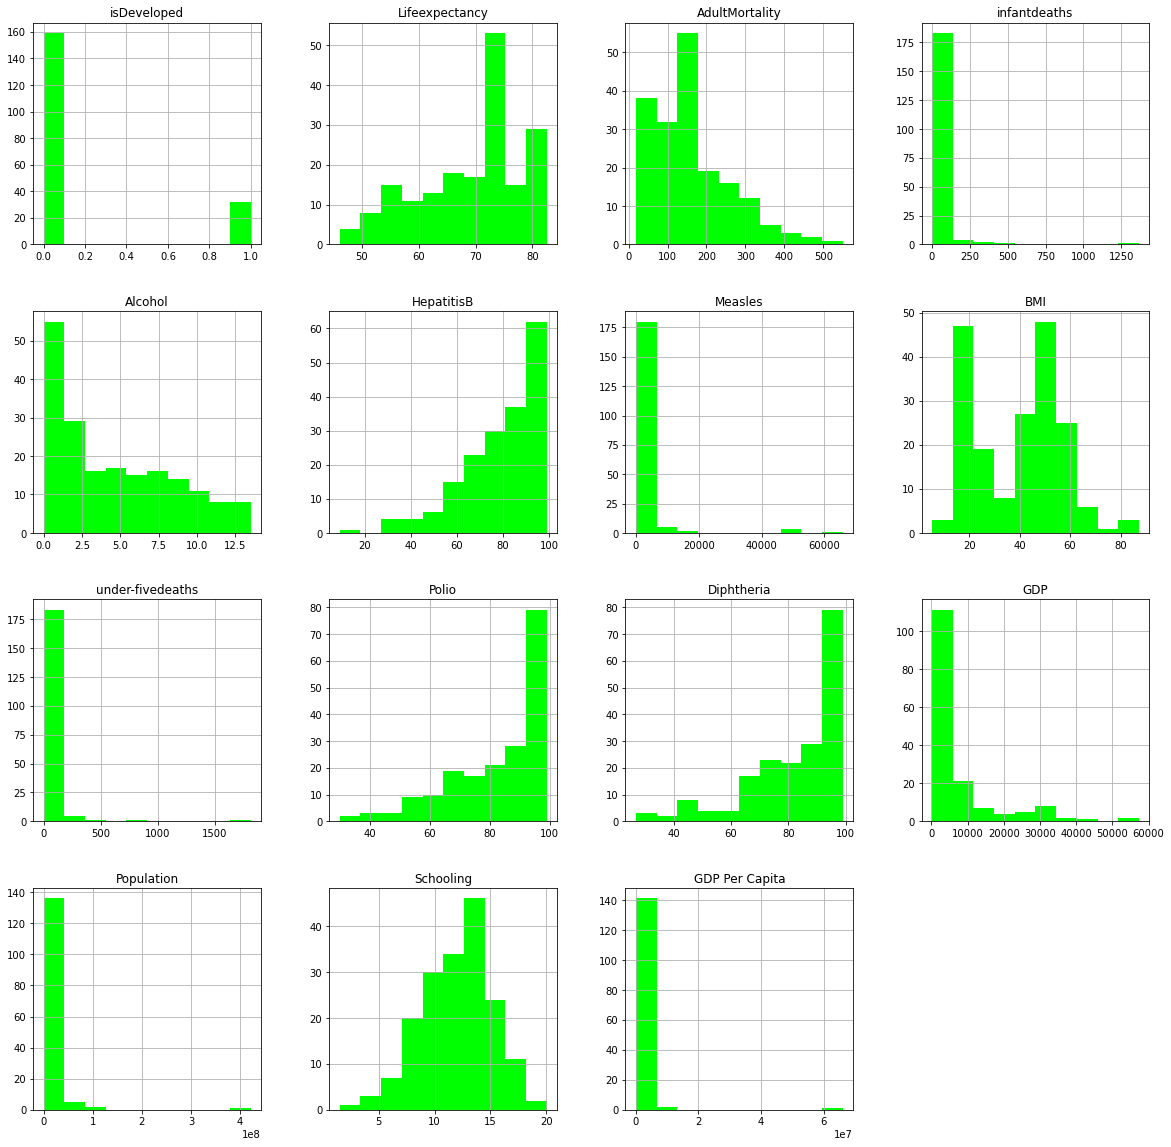

In [4]:
#Print all distributions
dfLE.hist(color='lime', figsize=(20,20), grid=True)

<i><b><h2>Cumulative distributions<h2><b><i>

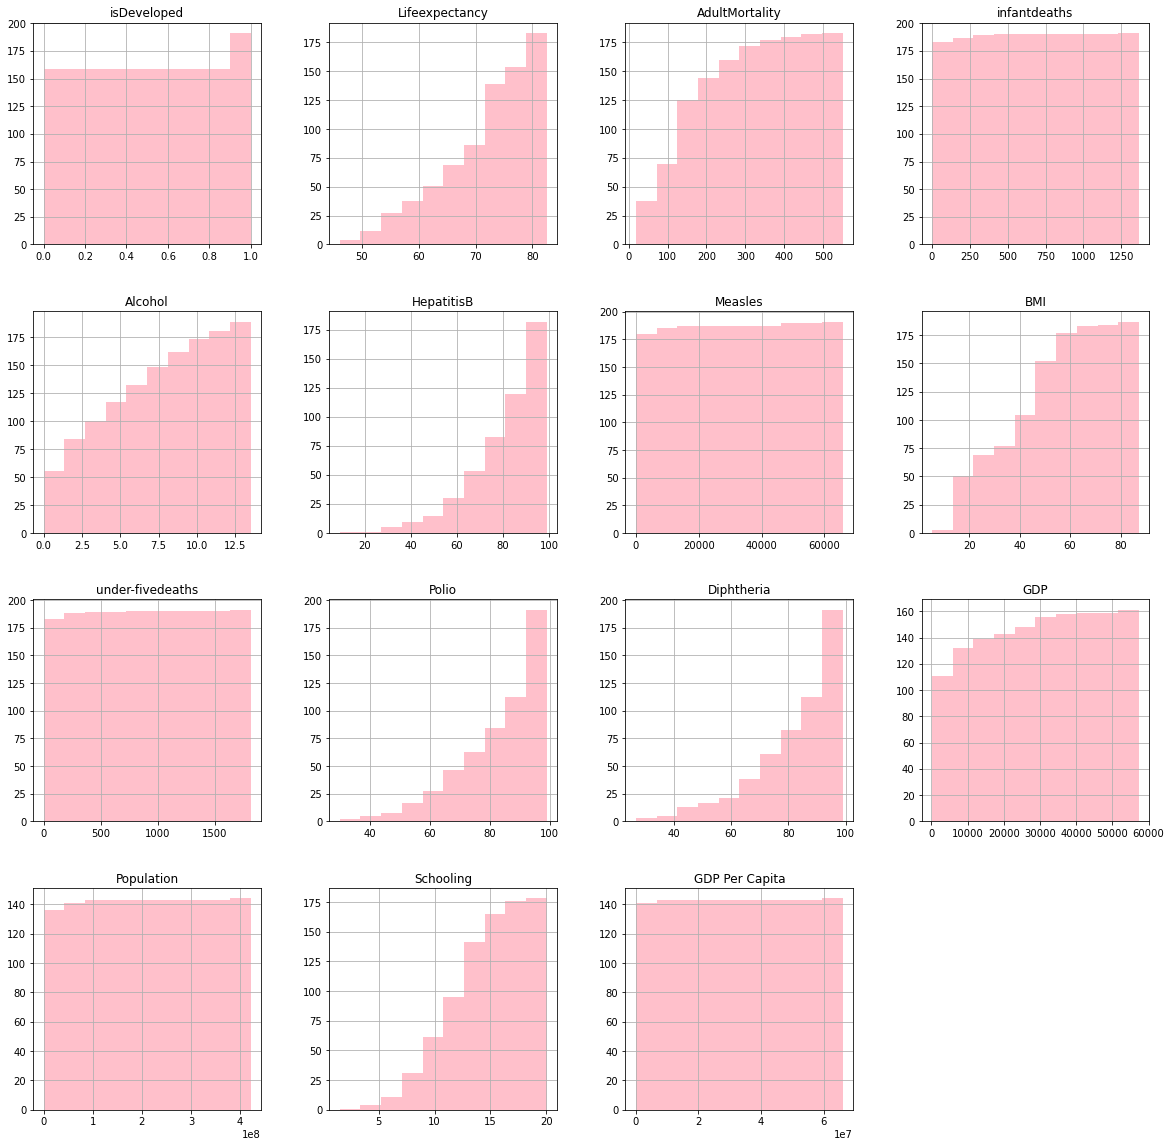

<Figure size 576x432 with 0 Axes>

In [5]:
dfLE.hist(color='pink', figsize=(20,20), grid=True, cumulative=True)
thinkplot.Show(axis=[120,220,20,160])

<h2>Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it without using a fit() method. Plot the emperical data on the same graph. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

In [6]:
#Analytical for Schooling
s = pd.Series(dfLE["Schooling"])
mu = s.mean()
sigma = s.std()
sNorm = ss.norm(mu,sigma)

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


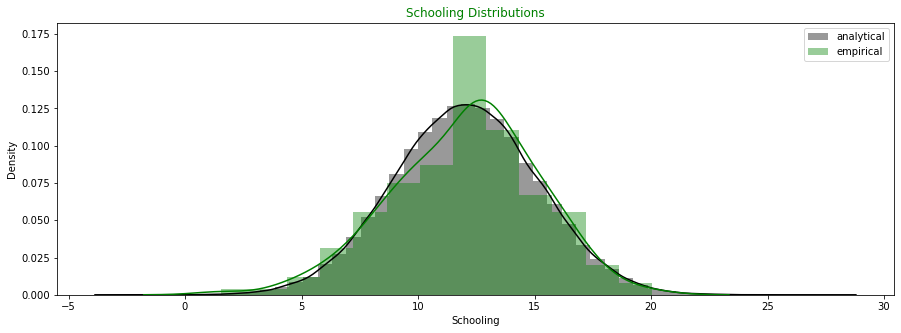

In [7]:
sns.distplot(sNorm.rvs(size=100000), color='black', label='analytical')
sns.distplot(dfLE['Schooling'], color='green', label='empirical')
thinkplot.Config()
plt.title('Schooling Distributions', color='green')
plt.show()

In [94]:

dfLE = dfLE.apply(pd.to_numeric, errors='coerce')
cdf = thinkstats2.Cdf(dfLE)
cdf.Prob(1)

TypeError: '<' not supported between instances of 'int' and 'numpy.str_'

<h2>Part 3: Create another analytical distribution for GDP per Capita (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

In [8]:
#Analytical for GDP/capita
cap = pd.Series(dfLE["GDP Per Capita"])
mu1 = cap.mean()
sigma1 = cap.std()
capNorm = ss.norm(mu1,sigma1)

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


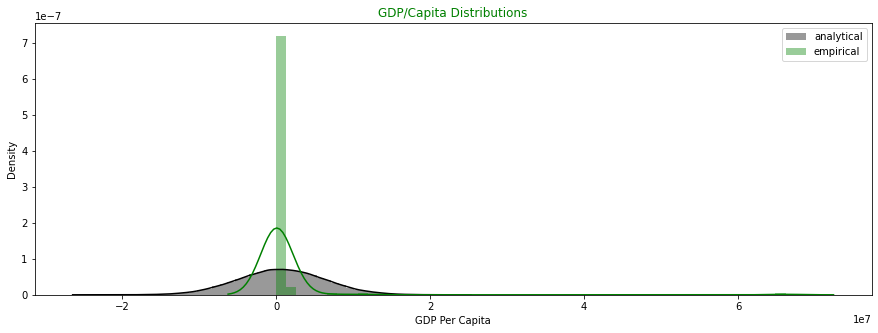

In [9]:
sns.distplot(capNorm.rvs(size=100000), color='black', label='analytical')
sns.distplot(dfLE['GDP Per Capita'], color='green', label='empirical')
thinkplot.Config()
plt.title('GDP/Capita Distributions', color='green')
plt.show()

<h2>Most values are clustered around zero (from -2 to 2) but I am going to drop it because I don't find it helpful.They trail off to about the same place but the empirical data shows that it should at zero not around zero.


In [19]:
dfLE= dfLE.drop(columns='GDP Per Capita')

<h2>Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)</h2>
<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 

<h2>Infant deaths, measles, under 5 deaths, gdp all have high incredibly high maxes. 
Need to drop those high maxes and see what the correlations are like after.

In [11]:
dfLE.describe() 

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP Per Capita
count,191.000000,183.000000,183.000000,191.000000,189.000000,182.000000,191.000000,187.000000,191.000000,191.000000,191.000000,161.000000,1.440000e+02,178.000000,1.440000e+02
mean,0.167539,69.224932,164.796448,29.133835,4.486793,79.287713,2326.165576,39.117146,40.412631,82.832863,82.628740,7268.713018,1.265734e+07,12.027739,6.974011e+05
std,0.374438,9.186432,96.185159,113.691604,3.873123,17.417697,7924.050116,17.175529,154.310693,15.925330,16.433269,10743.153637,3.827961e+07,3.104852,5.613661e+06
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,5.200000,0.000000,29.812500,26.812500,136.183210,2.920000e+02,1.531250,1.988100e+01
25%,0.000000,62.475000,80.406250,0.000000,1.000000,68.150000,4.781250,20.887500,0.000000,72.000000,72.375000,794.523010,9.623203e+05,9.971875,1.125868e+03
50%,0.000000,72.487500,146.562500,2.625000,3.582667,83.376068,138.937500,43.843750,3.250000,88.187500,88.500000,2847.853392,3.665163e+06,12.359375,7.443430e+03
75%,0.000000,75.106250,219.593750,21.062500,7.466000,94.687500,1501.593750,52.275000,25.281250,96.062500,96.031250,7741.748090,1.034789e+07,14.093750,6.091361e+04
max,1.000000,82.537500,550.062500,1366.687500,13.497333,99.000000,65857.937500,87.300000,1812.500000,99.000000,99.000000,57362.874601,4.214677e+08,20.037500,6.616857e+07


In [20]:
dfCorr = dfLE[dfLE['infantdeaths']<=30]
dfCorr = dfLE[dfLE['Measles']< 1600]
dfCorr = dfLE[dfLE['under-fivedeaths']<30]
dfCorr = dfLE[dfLE['GDP']<10000]

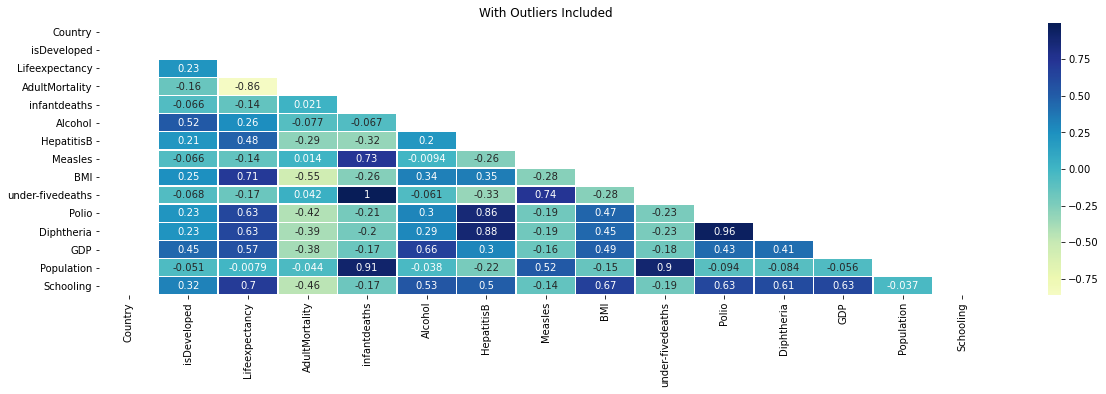

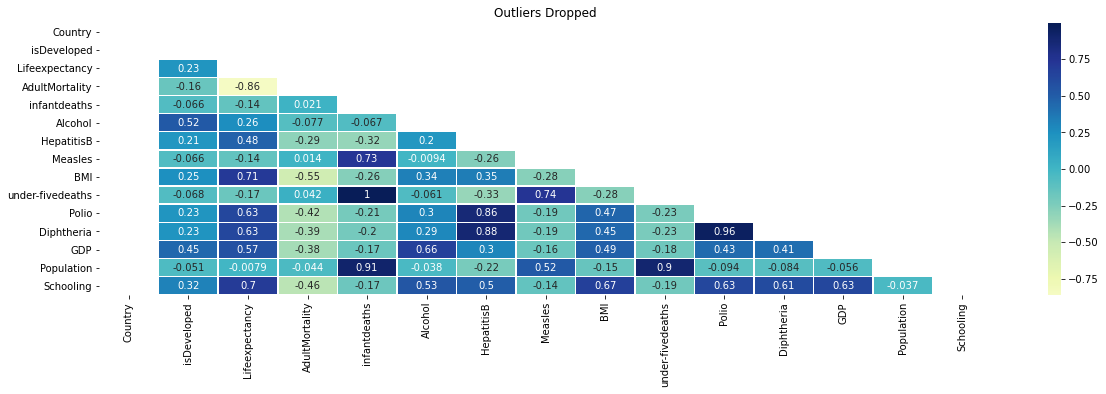

In [67]:
d = dfCorr.apply(pd.to_numeric, errors='coerce')
d = d.corr()
d2 = dfCorr.apply(pd.to_numeric, errors='coerce')
d2 = d2.corr()
plt.rcParams["figure.figsize"] = (20,5)
mask = np.triu(np.ones_like(d, dtype=bool))
sns.heatmap(d, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.title('With Outliers Included', color='black')
plt.show()
sns.heatmap(d2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.title('Outliers Dropped', color='black')
plt.show()

<h2><b>Inferences from dropping outliers:<b><h2>

<li>GDP and GDP per capita are a lot less negatively correlated.
<li>Hepatitis B and GDP became a bit more correlated.
<li>Alcohol and Measles became a little less correlated.
<li>Adult Mortality and isDeveloped saw the most change over all. This would be due to dropped the extremes of poverty and the extremes of the wealthy.
<li>Life expectancy and population became less correlated.
<li>Overall, it didnt drastically change anything. 

<h2>Part 5: Calculate correlations (25pts)</h2>
<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

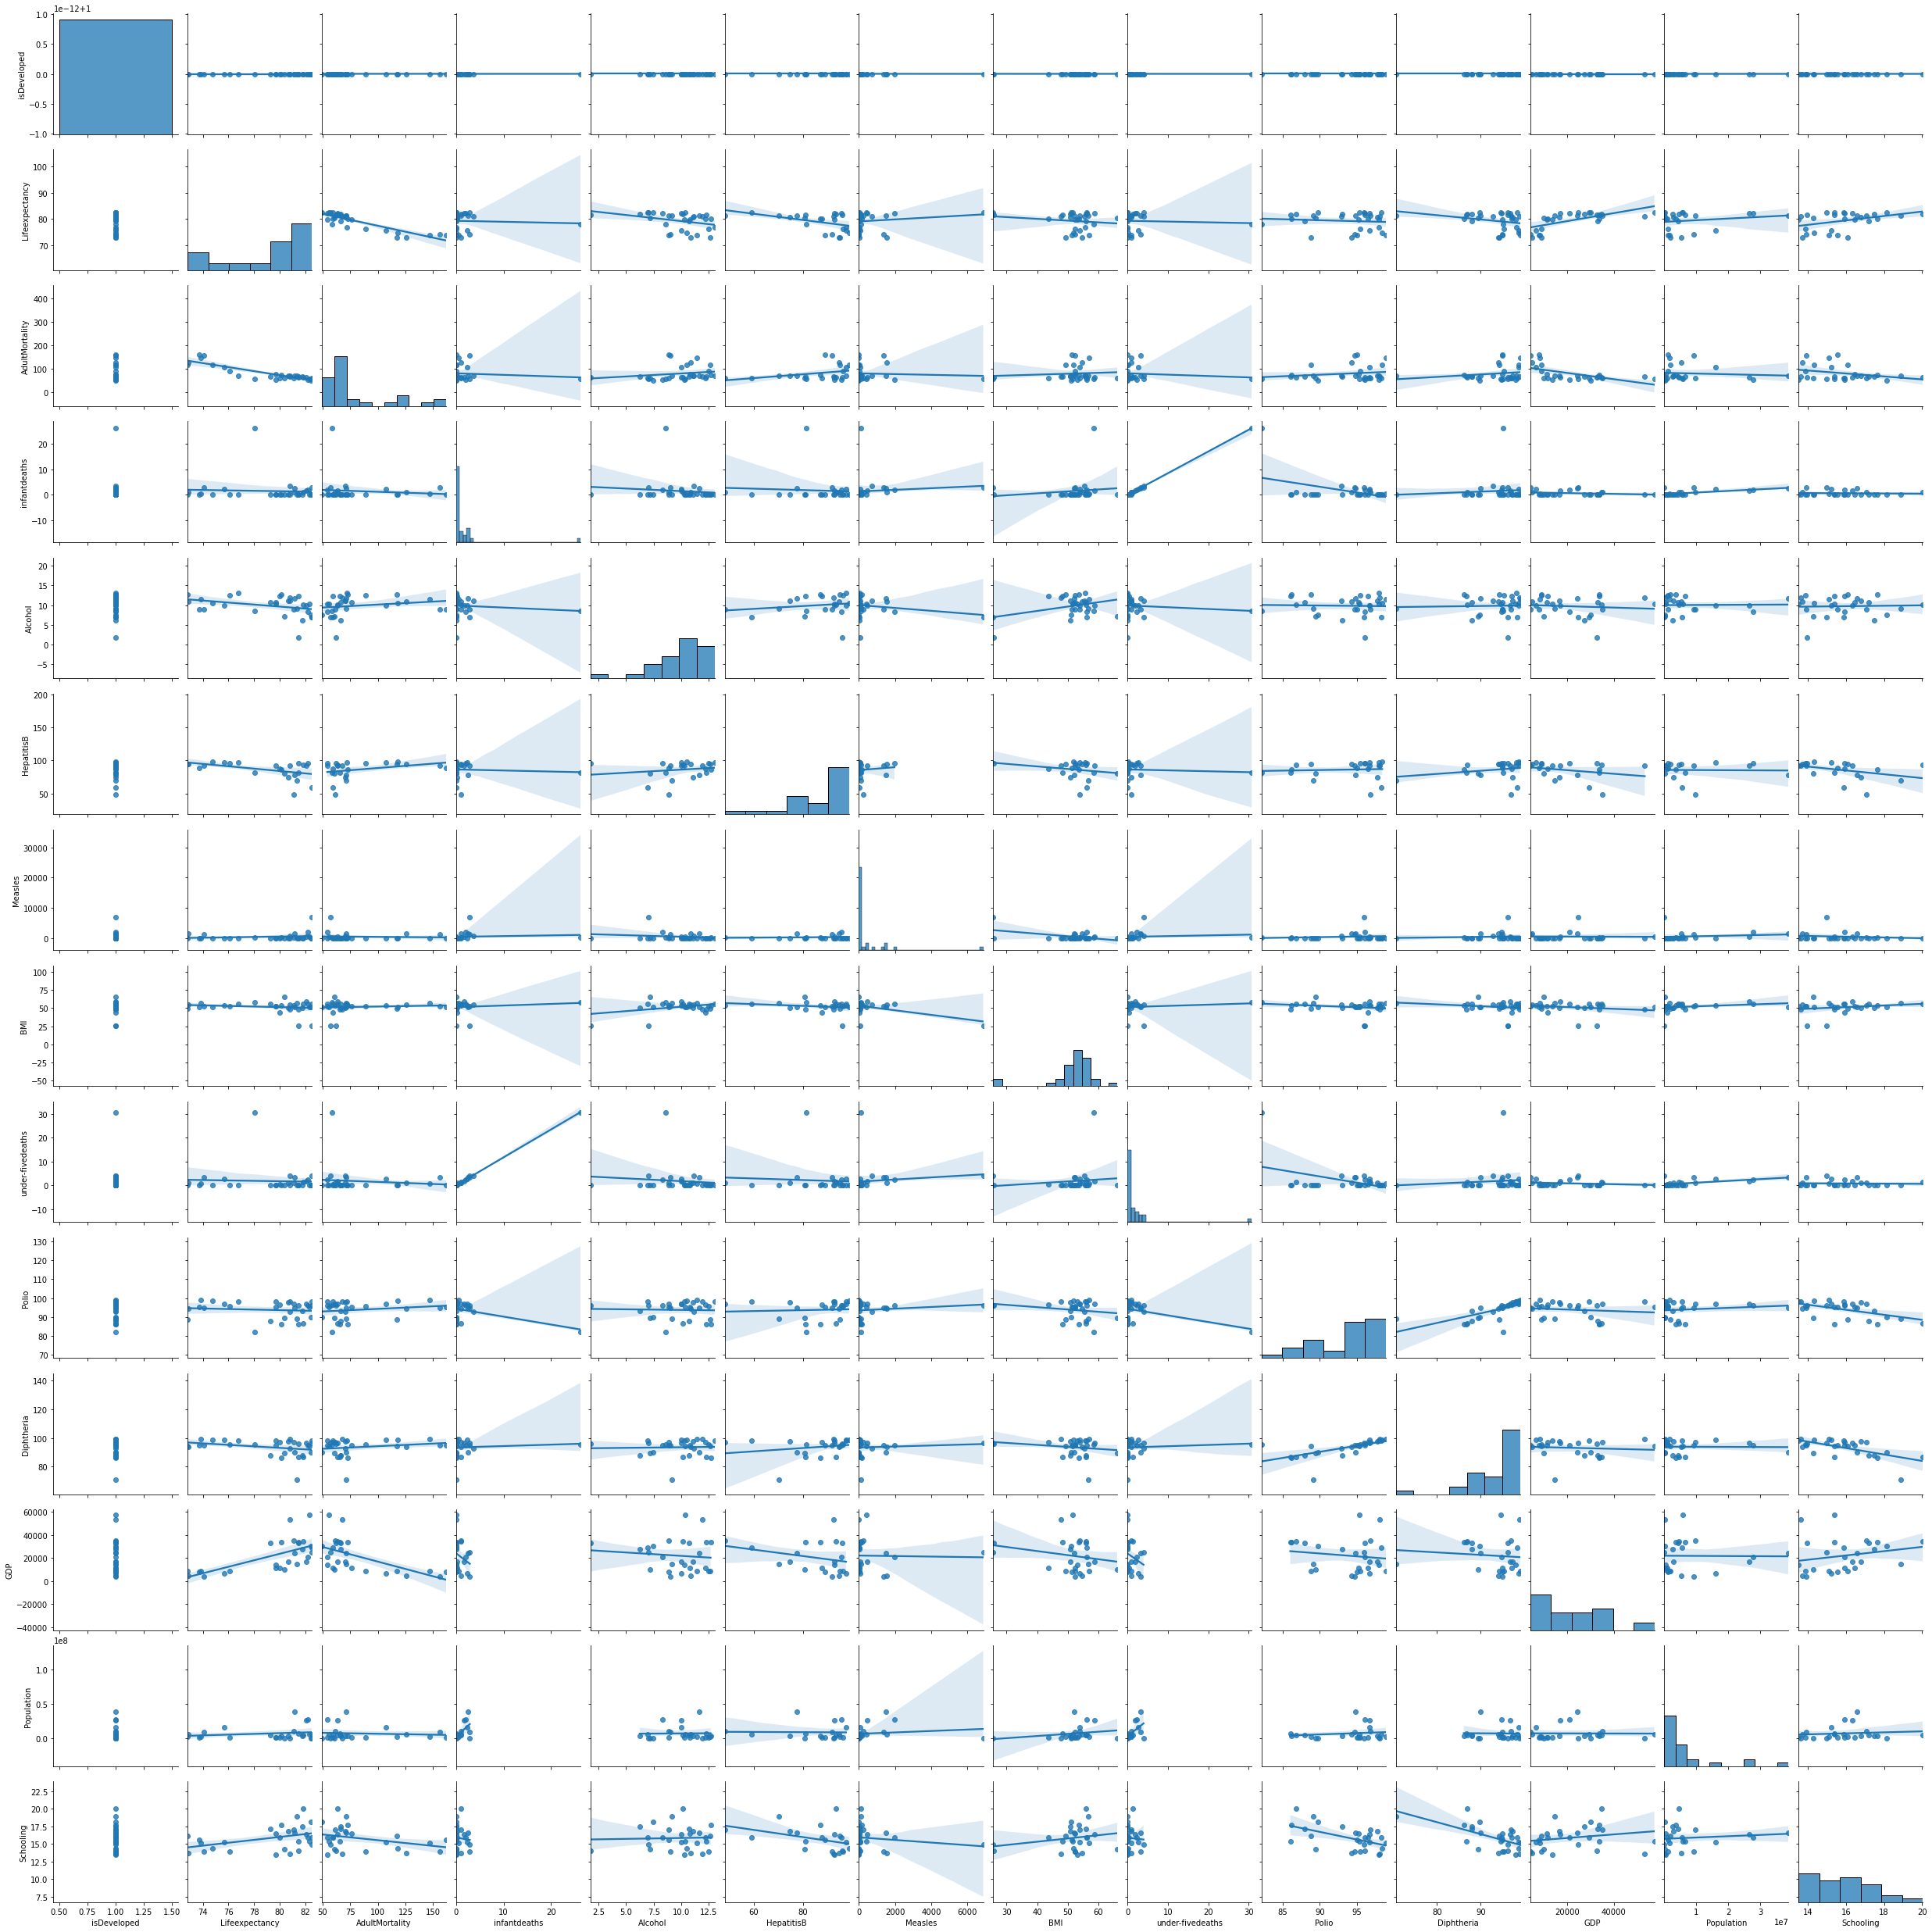

In [84]:
#Calculate correlations and analyze. 
dfdev = dfLE[dfLE['isDeveloped']==True]
dfnotdev = d2[d2['isDeveloped']==False]
sns.pairplot(dfdev, dropna=True, kind="reg")
plt.show()

<h2>Things to disregard:
<hr>
<li>Infant deaths and under 5 deaths have a direct correlation as all infants are under 5 so that can be disregarded.




3 strong correlations for life expectancy and developed nations:
<li>GDP. Richer countries can afford better healthcare.
<li>Schooling. Could be nations with better school systems also have better healthcare systems.
<li>Adult mortality. These would be pretty directly correlated if a countries population is majority adults.

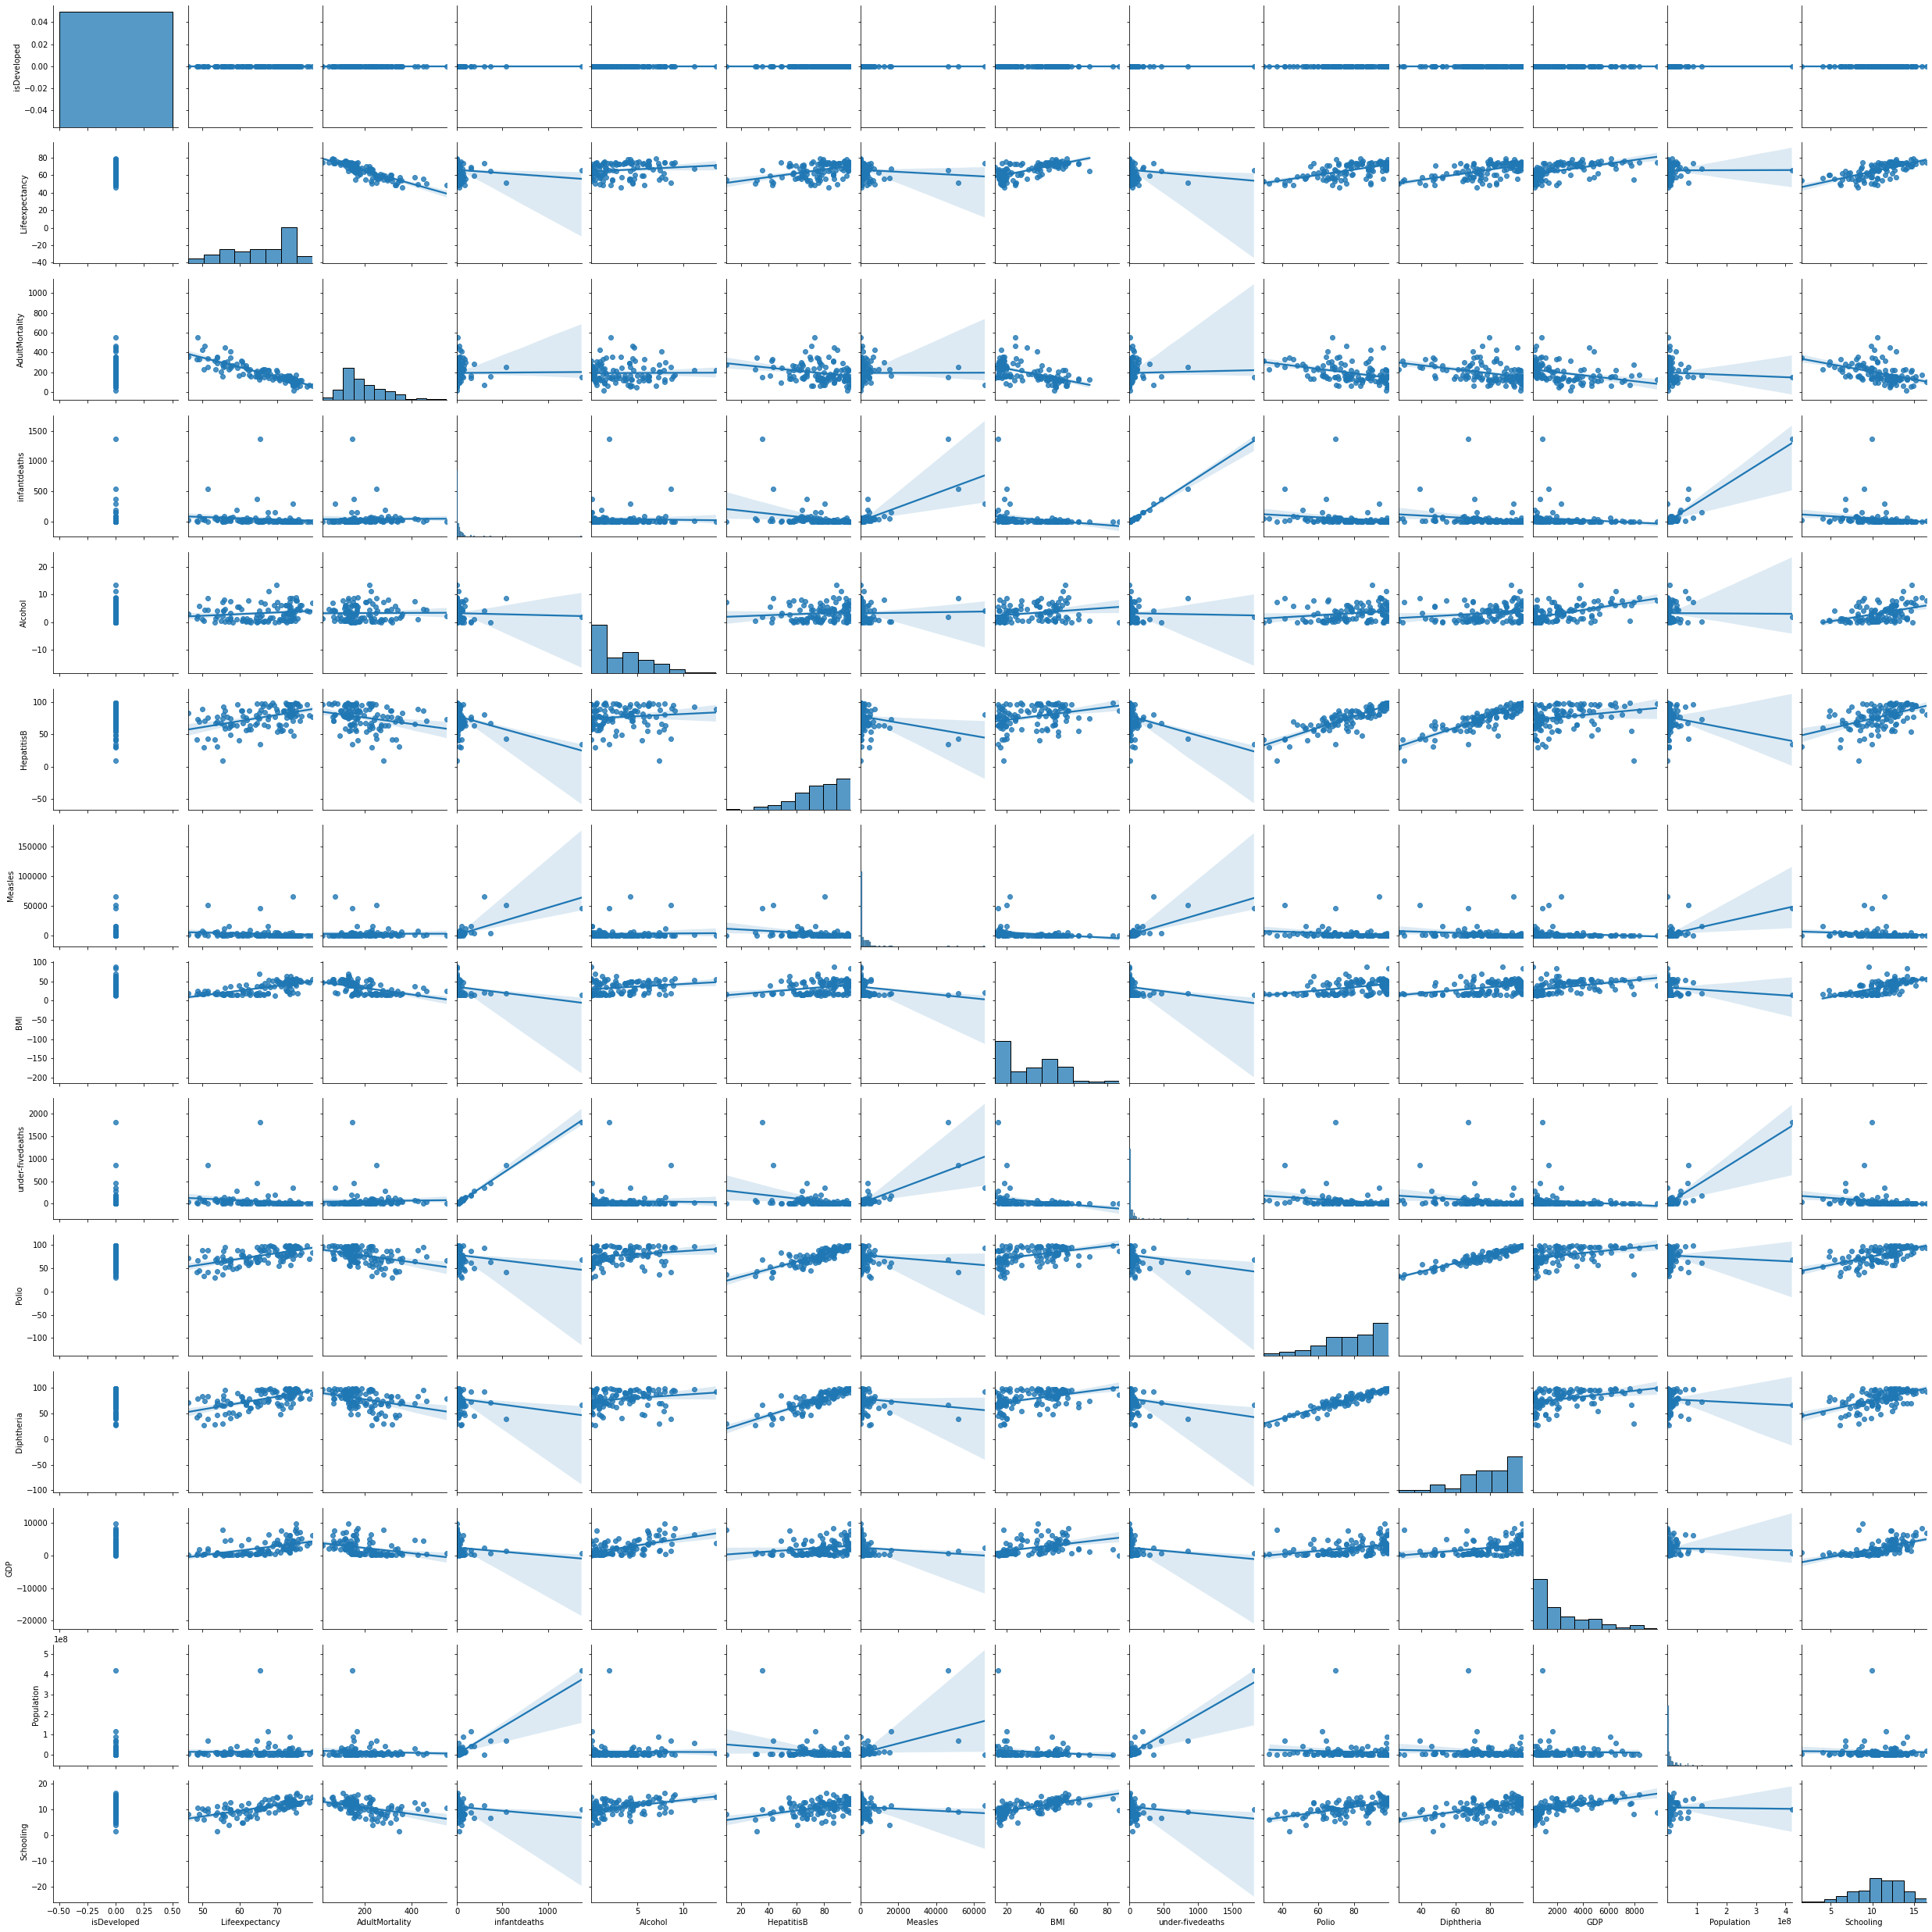

In [47]:
sns.pairplot(dfnotdev, dropna=True, kind="reg")
plt.show()


<h2>3 strong correlations for with life expectancy for undeveloped nations:
<hr>
<li> Polio
<li> Diphtheria
<li> Hepatitis B

All more of these diseases there are in undeveloped nations the more their life expectancy goes down.

Other things to note: 
<li>Polio, Diphtheria, and Hep B are all strongly correlated with each other. This would be because they are more common in countries where vaccine rates are low. 
<li>Measles and infant deaths as well as under-5deaths have a strong positive correlation. This could be causal for these deaths.

<h2>Areas where developed and undeveloped nations differ:<h2>
<hr>
<li>Schooling and diphtheria. In developed nations, more people that have diphtheria have schooling. In undeveloped the most people that have it are less educated. 
<li>population and under 5 deaths- undeveloped nations have a positive correlation and developed nations dont appear to have much of a correlation. 
